In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline 

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
# df[df[3] == '?'].index.values
# df.shape
# df.drop(df[df[3] == '?'])

In [4]:
for column in [0,1,3,4,5,6,13]:
    print (column)
    df.drop(index=df[df[column] == '?'].index.values, inplace=True)

0
1
3
4
5
6
13


In [5]:
df[:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


In [6]:
col_numberic = [1,2,7,10,13,14]
col_category = [0,3,4,5,6,8,9,11,12,15]
df[col_numberic] = df[col_numberic].astype(float)
df[col_category] = df[col_category].astype('category')
print (df.dtypes)

0     category
1      float64
2      float64
3     category
4     category
5     category
6     category
7      float64
8     category
9     category
10     float64
11    category
12    category
13     float64
14     float64
15    category
dtype: object


In [7]:
# Category features => one hot encoding vectors
# train_df = pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.columns.values:
    # Encoding only categorical variables
#     print (col)
    if df[col].dtype.name=='category':
    # Using whole data to form an exhaustive list of levels
#     data=X_train[col].append(X_test[col])
        le.fit(df[col])
        df[col] = le.transform(df[col])
#         print ()
#         print (le.transform(df[col]))
#     X_train[col]=le.transform(X_train[col])
#     X_test[col]=le.transform(X_test[col])

train_df = df.copy()
ix_pos = df[15] == 0
ix_neg = df[15] != 0
train_df.loc[ix_pos,15] = 1
train_df.loc[ix_neg,15] = 0

# train_df = df
train_df[:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.00,1,0,12,7,1.25,1,1,1.0,0,0,202.0,0.0,1
1,0,58.67,4.46,1,0,10,3,3.04,1,1,6.0,0,0,43.0,560.0,1
2,0,24.50,0.50,1,0,10,3,1.50,1,0,0.0,0,0,280.0,824.0,1
3,1,27.83,1.54,1,0,12,7,3.75,1,1,5.0,1,0,100.0,3.0,1


In [8]:
# train_df[4].unique()
# ix_neg
train_df.loc[ix_pos,15][:3]

0    1
1    1
2    1
Name: 15, dtype: int64

In [9]:
# Normalize data
ss = StandardScaler()
train_df[col_numberic] = ss.fit_transform(train_df[col_numberic])
train_df[:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,-0.056962,-0.961440,1,0,12,7,-0.295171,1,1,-0.302596,0,0,0.128682,-0.193125,1
1,0,2.296536,-0.073565,1,0,10,3,0.236217,1,1,0.704516,0,0,-0.816802,-0.086443,1
2,0,-0.592078,-0.861903,1,0,10,3,-0.220955,1,0,-0.504019,0,0,0.592504,-0.036150,1
3,1,-0.310572,-0.654865,1,0,12,7,0.446990,1,1,0.503093,1,0,-0.477855,-0.192553,1


In [10]:
all_names = list(train_df.columns.values)
name_col_x = all_names[:-1]
name_col_Y = all_names[-1]
print (name_col_x)
print (name_col_Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
15


In [11]:
X_data = train_df[name_col_x].values
Y_data = train_df[name_col_Y].values

In [12]:
Y_data.dtype

dtype('int64')

In [35]:
# Choose the model here!!!!
# clf = svm.SVC(gamma='auto')
# clf = tree.DecisionTreeClassifier(max_depth=6, max_features=13, min_samples_leaf=2, min_samples_split=0.1)
clf = tree.DecisionTreeClassifier(max_depth=6, max_features= 6, min_samples_split=0.2, min_samples_leaf=4)

# {'max_depth': 5, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 1.0}

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# precision_recall_fscore_support(y_test, y_pred)
# clf.score(X_test, y_test)
# report_lr = precision_recall_fscore_support(y_test, y_pred, average='binary')
# print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
#            (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test, y_pred)))

In [37]:
scores = cross_validate(clf, X_data, Y_data, cv=StratifiedKFold(n_splits=10, shuffle=True), scoring=['accuracy', 'precision', 'recall'],
                       return_train_score=False)
print (scores.keys())
print (scores['test_accuracy'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
[0.62121212 0.83333333 0.86363636 0.87878788 0.78787879 0.83333333
 0.89230769 0.90625    0.796875   0.859375  ]


In [38]:
print ("precision = %0.2f, recall = %0.2f, accuracy = %0.2f" % \
           (scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_accuracy'].mean()))

precision = 0.78, recall = 0.86, accuracy = 0.83


In [39]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
# clf.fit(X_train, y_train)
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("ml") 

# graph 

In [40]:
# clf.feature_importances_

In [54]:
param_grid = {'max_depth': np.arange(3, 10), 'max_features': np.arange(3,14), 
              'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), 
              'min_samples_leaf': np.arange(1,5)}
#               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True)}
# param_grid = {'max_depth': np.arange(3, 10)}
param_grid = {'min_samples_leaf': np.arange(1,5)}

# grid_search = GridSearchCV(tree.DecisionTreeClassifier(max_features=9), param_grid, cv=10)
grid_search = GridSearchCV(tree.DecisionTreeClassifier(max_depth=6, max_features= 6, min_samples_split=0.9), param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True))
grid_search.fit(X_data, Y_data)
print (grid_search.best_params_)
print (grid_search.best_score_)
# print (grid_search.grid_scores_)
# {'max_depth': 4, 'max_features': 12, 'min_samples_split': 0.8}
# {'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 0.30000000000000004, 'min_samples_split': 0.4}
# {'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 0.9} 0.9035222052067381

{'min_samples_leaf': 1}
0.8223583460949464


In [55]:
para_values = []
acc_vlaues = []
for prs in grid_search.grid_scores_:
    para_values.append(prs[0]['min_samples_leaf'])
    acc_vlaues.append(prs[1])
    
# print (para_values, acc_vlaues)

/home/quang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


No handles with labels found to put in legend.


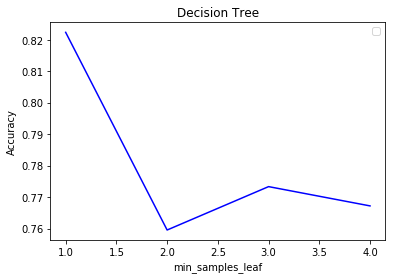

In [56]:
line1, = plt.plot(para_values, acc_vlaues, 'b')
# line2, = plt.plot(max_depths, test_results, ‘r’, label='bce')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Decision Tree')
plt.ylabel('Accuracy')
plt.xlabel('min_samples_leaf')
plt.show()

In [22]:
np.linspace(0.1, 0.5, 5, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5])